# Clasification

In [10]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

(300, 2) (300,) (240, 2) (60, 2) (240,) (60,)


<ipython-input-11-28ead1d400d1>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(X_train[:,0], X_train[:,1], c = 'b',edgecolors='k', s = 40, cmap ='Dark2')
<ipython-input-11-28ead1d400d1>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(X_test[:,0], X_test[:,1], c = 'r',edgecolors='k', s = 40, cmap ='Dark2')


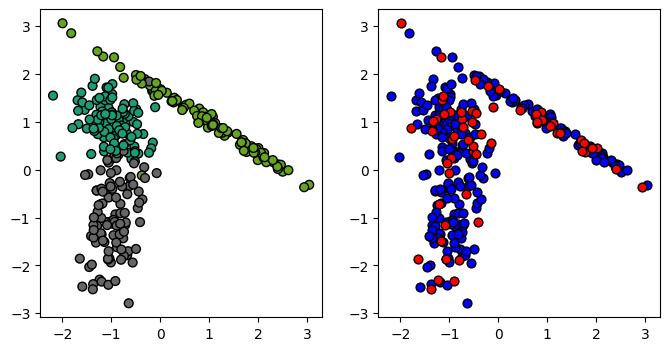

In [11]:
# we create 100 separable points
X, y = make_classification(n_samples = 300, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Plot train / test data
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)
_,axes = plt.subplots(1,2, figsize = (8,4))
axes[0].scatter(X[:,0], X[:,1], c = y,edgecolors='k', s = 40, cmap ='Dark2')
axes[1].scatter(X_train[:,0], X_train[:,1], c = 'b',edgecolors='k', s = 40, cmap ='Dark2')
axes[1].scatter(X_test[:,0], X_test[:,1], c = 'r',edgecolors='k', s = 40, cmap ='Dark2')
#
# axes[0].set_title("Train data")
# axes[1].scatter(X_test[:,0], X_test[:,1], c = y, s = 40, cmap = plt.cm.Spectral)
# axes[1].set_title("Test data")

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import sys
sys.path.append('/content/drive/MyDrive/ML/machine_learning/Tools')


In [14]:
import os
os.listdir("/content/drive/MyDrive/ML/machine_learning/Tools")


['Functions.py', '__pycache__']

In [15]:
import os

ruta = "/content/drive/MyDrive/ML/machine_learning/Tools"
print(os.listdir(ruta))  # Verifica los archivos en la carpeta


['Functions.py', '__pycache__']


In [16]:
import sys
sys.path.append("/content/drive/MyDrive/ML/machine_learning/Tools")


from Functions import plot_decision_boundary

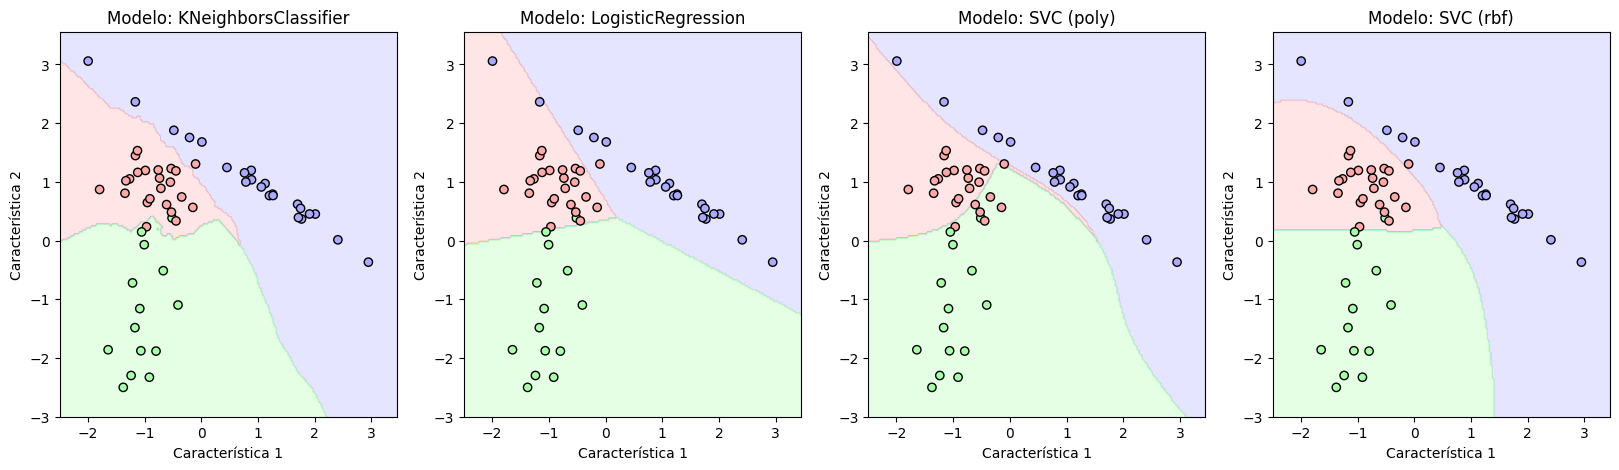

In [17]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

models = [
    kNN(n_neighbors=5, metric="euclidean"),
    LogisticRegression(),
    SVC(kernel="poly", C=2),
    SVC(kernel="rbf", C=2),
]
names = ["kNN (k=5)", "Log Regression", "SVM (Poly)", "SVM (RBF)"]
preds = {}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    preds[names[i]]=model.predict(X_test)
    plot_decision_boundary(model, X_test, y_test, grid_size=(200, 200), n_classes=3, ax=axes[i])
plt.show()


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for kNN (k=5) -----########
-- Acc --|	 -- Prec --|	 -- Rec --|	 -- F1 --  
  0.950  |	   0.950   |	   0.950  |	   0.950  	
########----- Results for Log Regression -----########
-- Acc --|	 -- Prec --|	 -- Rec --|	 -- F1 --  
  0.933  |	   0.933   |	   0.933  |	   0.933  	
########----- Results for SVM (Poly) -----########
-- Acc --|	 -- Prec --|	 -- Rec --|	 -- F1 --  
  0.900  |	   0.900   |	   0.900  |	   0.900  	
########----- Results for SVM (RBF) -----########
-- Acc --|	 -- Prec --|	 -- Rec --|	 -- F1 --  
  0.967  |	   0.967   |	   0.967  |	   0.967  	


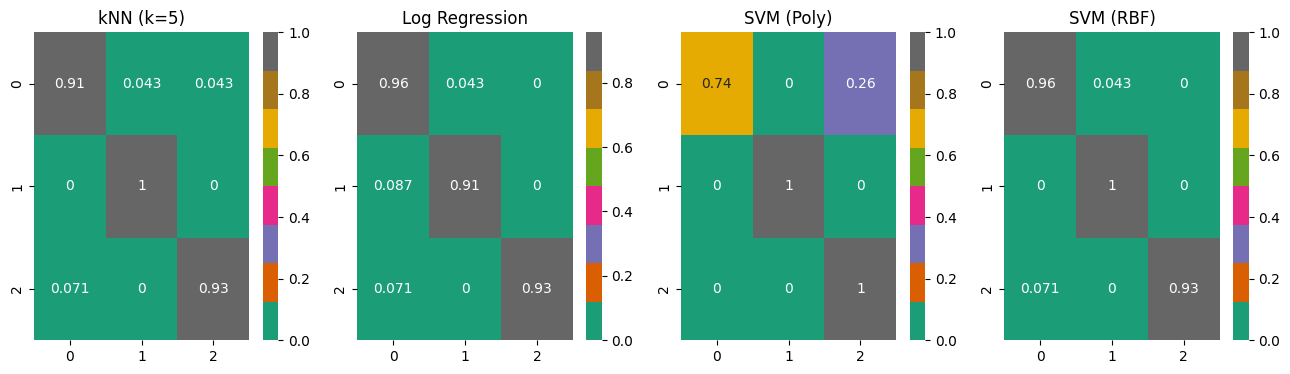

In [19]:
_, axes = plt.subplots(1, 4 , figsize = (16,4))

# Compute metrics - plot confusion matrix
for name,ax in zip(names,axes) :
  print ("########----- Results for {0} -----########".format( name ))
  accuracy = accuracy_score( y_test , preds[name] )
  precision = precision_score( y_test , preds[name] , average = "micro")
  recall = recall_score( y_test , preds[name] , average = "micro")
  f1 = f1_score( y_test , preds[name] , average = "micro")
  cm = confusion_matrix( y_test , preds[name] , normalize='true')
  ##--------------
  print("-- Acc --|\t -- Prec --|\t -- Rec --|\t -- F1 --  ")
  print("  {0:.3f}  |\t   {1:.3f}   |\t   {2:.3f}  |\t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "Dark2", annot = True, ax = ax )
  ax.set_title( name )

In [ ]:
for model, name in zip(models,names):
  print('f1')
  metrics=cross_val_score(model,X_train,y_train,cv=5,scoring="f1_micro")
  print('Classif scores for model: {0}'.format(name))
  print(metrics)
  print('accuracy')
  metrics=cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
  print('Classif scores for model: {0}'.format(name))
  print(metrics)
  print('Avg score:{0}'.format(np.mean(metrics)))
  print('-----------------------------------------------------------------')

f1
Classif scores for model: kNN (k=5)
[0.89583333 0.95833333 1.         0.97916667 0.97916667]
accuracy
Classif scores for model: kNN (k=5)
[0.89583333 0.95833333 1.         0.97916667 0.97916667]
Avg score:0.9625
-----------------------------------------------------------------
f1
Classif scores for model: Log Regression
[0.95833333 0.95833333 0.97916667 0.91666667 0.95833333]
accuracy
Classif scores for model: Log Regression
[0.95833333 0.95833333 0.97916667 0.91666667 0.95833333]
Avg score:0.9541666666666666
-----------------------------------------------------------------
f1
Classif scores for model: SVM (Poly)
[0.95833333 0.95833333 0.95833333 0.9375     0.95833333]
accuracy
Classif scores for model: SVM (Poly)
[0.95833333 0.95833333 0.95833333 0.9375     0.95833333]
Avg score:0.9541666666666666
-----------------------------------------------------------------
f1
Classif scores for model: SVM (RBF)
[0.95833333 0.97916667 0.97916667 0.9375     0.95833333]
accuracy
Classif scores f

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


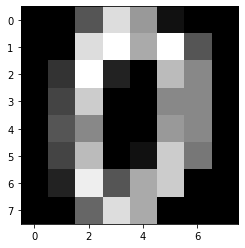

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [20]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

(1000, 3) (1000,)


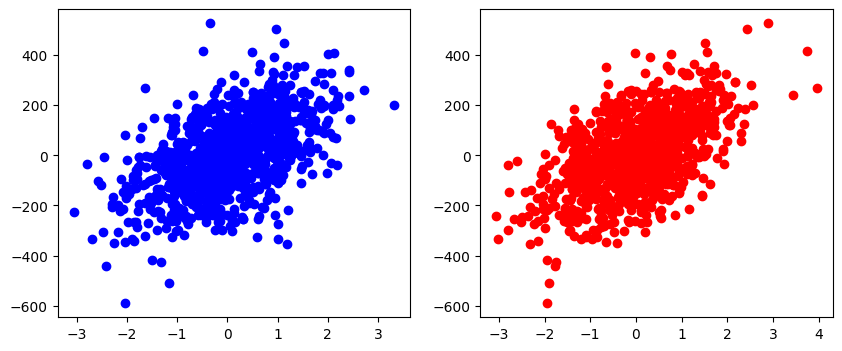

In [49]:
X, y = make_regression(n_samples = 1000, n_features = 3 , noise = 2 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

_, axes = plt.subplots (1,2,figsize=( 10 , 4 ))
axes=axes.ravel()
axes[0].scatter( X[:,0] , y , color = 'blue')
axes[1].scatter( X[:,1] , y , color = 'red')
print (X.shape, y.shape)



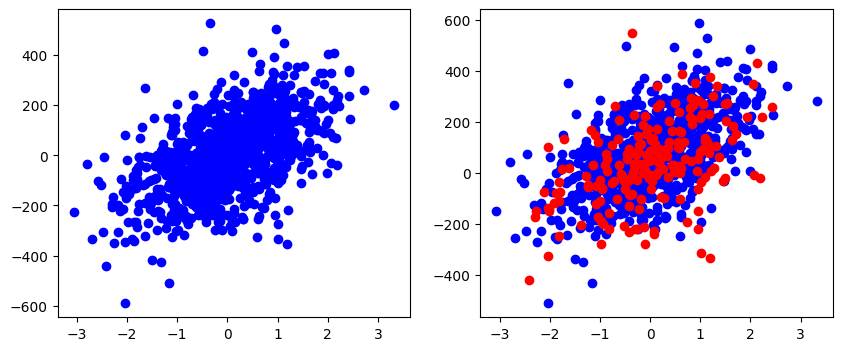

(1000, 3) (1000,) (800, 3) (200, 3) (800,) (200,)


In [50]:
np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1
y_train= y_train + np.random.normal(len(y_train)) * 0.1
# Plot train / test data
_,axes=plt.subplots(1,2,figsize=(10,4))
axes[0].scatter(X[:,0], y, color="blue", label="Datos reales")
axes[1].scatter(X_train[:,0], y_train, color="blue", label="Datos reales")
axes[1].scatter(X_test[:,0], y_test, color="red", label="Datos reales")
plt.show()
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

LinearRegression()

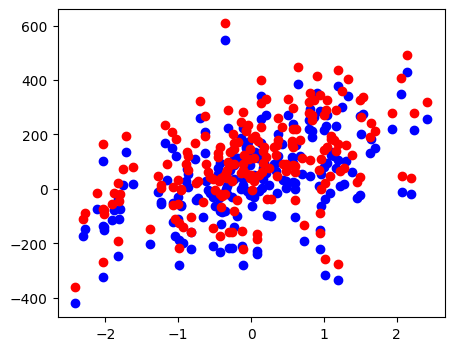

In [51]:
# Train a linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

_,axes=plt.subplots(figsize=(5,4))
plt.scatter(X_test[:,0], y_test, color="blue", label="Datos reales")
plt.scatter(X_test[:,0], pred, color="red", label="Datos reales")
plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE